# Loading Customer Data

In [1]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Loading Dataset
c_data = pd.read_csv('../Raw_data/marketing_campaign.csv', sep="\t")

In [3]:
c_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Finding Missing Values 

In [4]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
c_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- There are 24 null values in income column
- DT_Customer should be parsed as datetime not as object

In [6]:
c_data.loc[pd.isna(c_data['Income']), 'Income']

10     NaN
27     NaN
43     NaN
48     NaN
58     NaN
71     NaN
90     NaN
91     NaN
92     NaN
128    NaN
133    NaN
312    NaN
319    NaN
1379   NaN
1382   NaN
1383   NaN
1386   NaN
2059   NaN
2061   NaN
2078   NaN
2079   NaN
2081   NaN
2084   NaN
2228   NaN
Name: Income, dtype: float64

We can fill missing values with Income mean to make our dataset more complete 

In [7]:
c_data.loc[pd.isna(c_data['Income']), 'Income'] = c_data['Income'].mean() 
c_data.shape

(2240, 29)

In [8]:
c_data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# Finding Duplicate Values

In [9]:
#Finding duplicate rows in dataframe 
c_data[c_data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


There are no duplicate rows in dataset

# Adding New Columns

In [10]:
#Calculating total expense of household
c_data['Total_Expenses'] = c_data['MntWines'] + c_data['MntFruits'] + c_data['MntMeatProducts'] + c_data['MntFishProducts'] + c_data['MntSweetProducts'] + c_data['MntGoldProds']


In [11]:
#Finding total number of children for househoulds
c_data['Children'] = c_data['Kidhome'] + c_data['Teenhome']

In [12]:
c_data["Age"] = 2021 - c_data["Year_Birth"]

# Finding Unique Values 

Finding unique values for categorical columns

In [13]:
pd.unique(c_data['Education'])

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [14]:
# Renaming '2n Cycle' as 'Master', 'Graduation' as 'Undergraduate' and 'Basic' as 'Highschool'
c_data['Education'] = c_data['Education'].str.replace('2n Cycle', 'Master')
c_data['Education'] = c_data['Education'].str.replace('Graduation', 'Undergraduate')
c_data['Education'] = c_data['Education'].str.replace('Basic', 'Highschool')

In [15]:
pd.unique(c_data['Marital_Status'])

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [16]:
# Adding 'Relationship Status' column and combining Marital Status values as 'Couple' or 'Single'
c_data['Relationship Status'] = c_data['Marital_Status']
c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Married', 'Couple')
c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Together', 'Couple')
c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Divorced', 'Single')
c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Widow', 'Single')
c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Absurd', 'Single')
c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Alone', 'Single')
c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('YOLO', 'Single')

# Dropping Unneccessary Columns

In [18]:
c_data = c_data.drop(columns=['Marital_Status', 'Kidhome', 'Teenhome', 'Year_Birth'])

In [19]:
c_data.dtypes

ID                       int64
Education               object
Income                 float64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Total_Expenses           int64
Children                 int64
Age                      int64
Relationship Status     object
dtype: object

# Checking Outliers

In [20]:
c_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


There is very high difference between mean and max values for Income and Age columns. We need to check them again by taking standart deviation into consideration

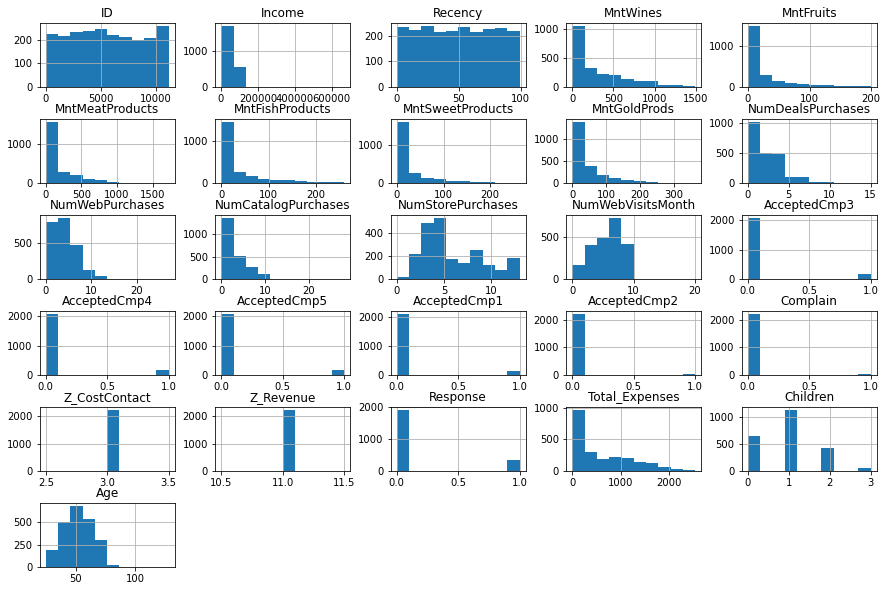

In [21]:
c_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

The graphs suggest that Age column has some outliers. However, whether Income has some outlier values is not clear. We need to check this columns closely with boxplot to understand outliers 

<AxesSubplot:xlabel='Age'>

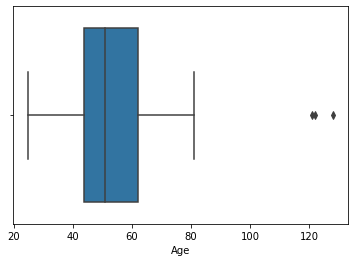

In [22]:
sns.boxplot(x = c_data['Age'])

In [23]:
#Removing Age outliers
c_data = c_data[c_data['Age'] < 100]

<AxesSubplot:xlabel='Income'>

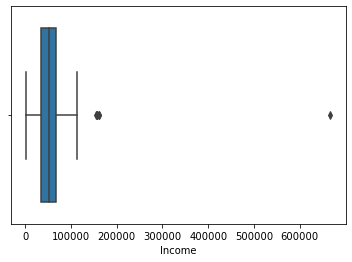

In [24]:
sns.boxplot(x = c_data['Income'])

In [25]:
#Removing Income outliers
c_data = c_data[c_data['Income'] < 500000]

In [26]:
c_data.shape

(2236, 29)

In [27]:
c_data.head()

,ID,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expenses,Children,Age,Relationship Status
0,5524,Undergraduate,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,3,11,1,1617,0,64,Single
1,2174,Undergraduate,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,3,11,0,27,2,67,Single
2,4141,Undergraduate,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,3,11,0,776,0,56,Couple
3,6182,Undergraduate,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,3,11,0,53,1,37,Couple
4,5324,PhD,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,3,11,0,422,1,40,Couple


# Conclusion

First, I checked if the data has any missing values and found that only Income column has small number of null values. I filled those values with the mean of Income to not lead them to change Income statistics for the data. Also, I checked dataset for any duplicate values but no duplicates found. 

After completing data cleaning, I generated new columns by combining seperated columns into single column as Total_Expenses and Children. Additionally, I generated an Age column using Year_Birth. I checked categorical values to see if values named properly, if not I made the necessary adjustments. 

Finally, I checked the columns for outliers and found that Age and Income columns has some. I removed them to make my analysis more coherent.